# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Car_sales.csv")
print(df.head())
print(df.info())

df.dropna(inplace=True)
if 'Year' in df.columns:
    df['Car_Age'] = 2024 - df['Year']
    df.drop('Year', axis=1, inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes
target_column = 'Price_in_thousands'

X = df.drop(target_column, axis=1)
y = df[target_column]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))



  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

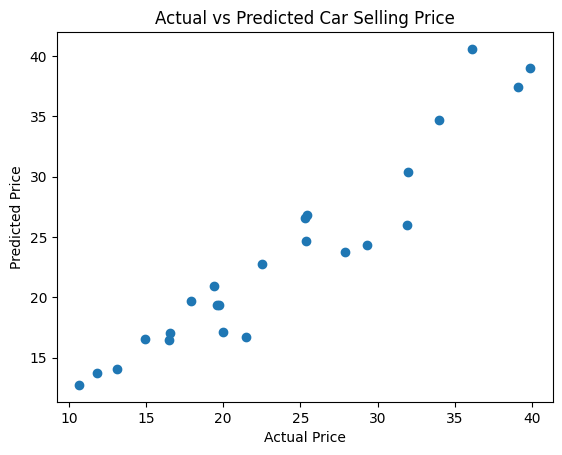

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Selling Price")
plt.show()


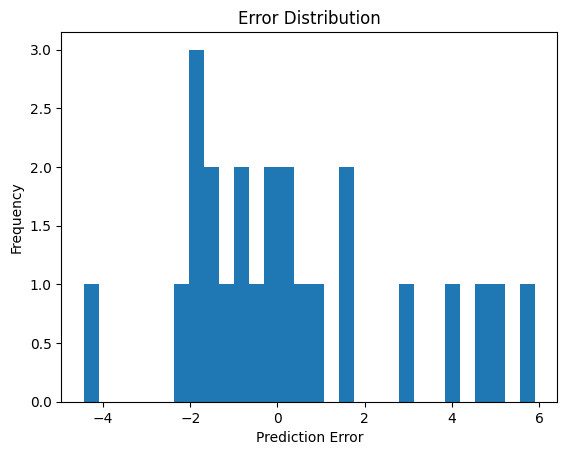

In [ ]:
errors = y_test - y_pred

plt.figure()
plt.hist(errors, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()


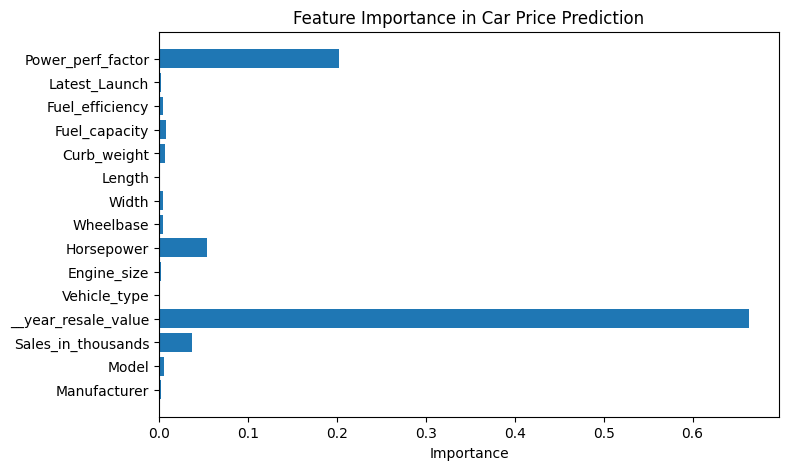

In [ ]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importance)
plt.xlabel("Importance")
plt.title("Feature Importance in Car Price Prediction")
plt.show()


In [ ]:
sample_input = X.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(sample_input)
print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 16.677170000000004


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
